<a href="https://colab.research.google.com/github/Deepu-Pk/AI-Lab9/blob/main/Kernel%20SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import io 
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
import pandas as pd
uploaded = files.upload()
train_data = pd.read_csv(io.BytesIO(uploaded['train3.csv']))
feature1 = train_data['2']
feature2 = train_data['3']
label1 = train_data['1']

Saving train3.csv to train3.csv


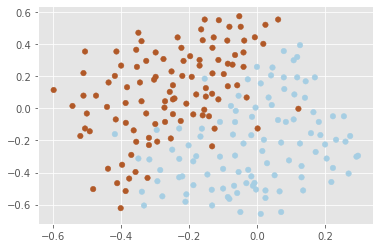

In [12]:
#Plotting data
x1 = []
x2 = []
Y = []
m = len(feature1)
for i in range(m):
    x1.append(feature1[i])
    x2.append(feature2[i])
    Y.append(label1[i])
X1 = [list(z) for z in zip(x1, x2)]
X =np.array(X1)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
plt.show()

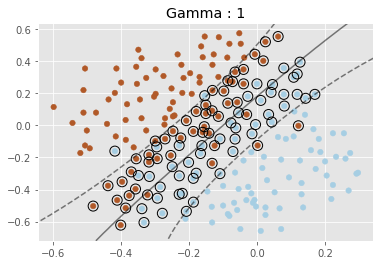

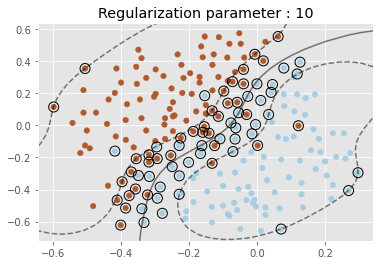

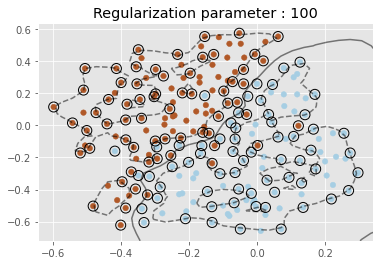

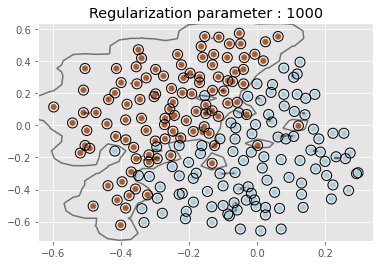

In [19]:
#SVM RBF Kernel
def RBL(c):
    global X,Y
    clf = svm.SVC(kernel='rbf', random_state=1, gamma=c, C=1)
    clf.fit(X,Y)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=plt.cm.Paired)
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
    # plot support vectors
    #plt.title("Regularization paramete : ",c) 
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
    if(c == 1):
        plt.title("Gamma : 1") 
    elif(c == 10):
        plt.title("Regularization parameter : 10")
    elif(c == 100):
        plt.title("Regularization parameter : 100")
    elif(c == 1000):
        plt.title("Regularization parameter : 1000")
    print()
    print()
    plt.show()


#gamma = 100
RBL(1)
RBL(10)
RBL(100)
RBL(1000)